In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()



,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [30]:
new_df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']].copy()
new_df2 = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']].copy()
new_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [3]:
new_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [4]:
# Q1 

# Count missing values per column
missing_counts = new_df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Filter to show only columns with missing values
columns_with_missing = missing_counts[missing_counts > 0]
print("\nColumns with missing values and their counts:\n", columns_with_missing)

# ans: horsepower


Missing values per column:
 engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Columns with missing values and their counts:
 horsepower    708
dtype: int64


In [31]:
# Q2 

median = new_df['horsepower'].median()

print(median)
print("type", type(median))


149.0
type <class 'float'>


In [6]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

<Axes: xlabel='horsepower', ylabel='Count'>

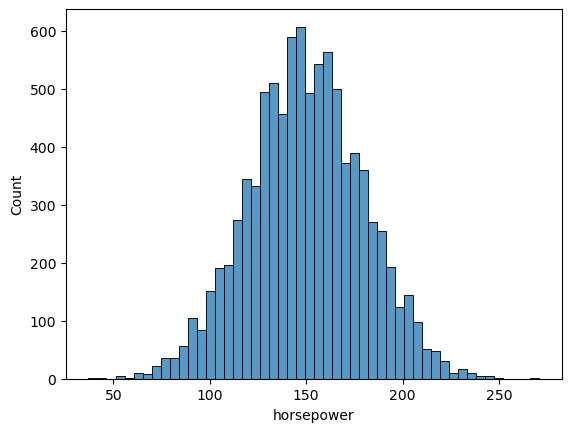

In [8]:
# test if the y has long tail distribution
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(df.horsepower, bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

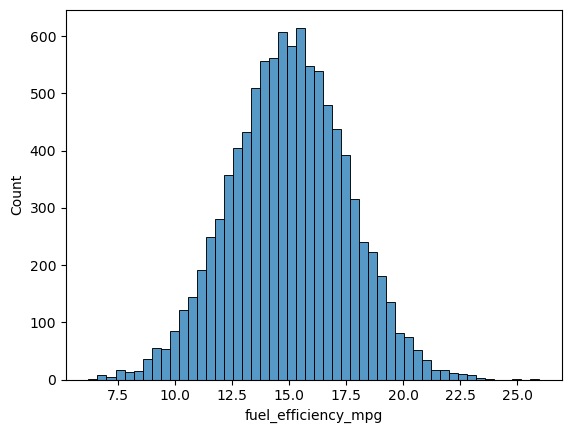

In [9]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [19]:
def split_data_0(seed, df):

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # df = df.fillna(0)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    df_test = df_test.fillna(0)

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)


    return df_train, df_val, df_test, y_train, y_val, y_test


def split_data_mean(seed, df):

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    mean = df_train['horsepower'].mean()
    df_train = df_train.fillna(mean)
    df_val = df_val.fillna(mean)
    df_test = df_test.fillna(mean)
    
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)


    return df_train, df_val, df_test, y_train, y_val, y_test

# option1: fill with 0
df1_train, df1_val, df1_test, y1_train, y1_val, y1_test = split_data_0(2, new_df)

# df1_train.head()
# # print(len(df1_train), len(df1_val), len(df1_test))
# # print(len(y1_train), len(y1_val), len(y1_test))

df2_train, df2_val, df2_test, y2_train, y2_val, y2_test = split_data_mean(2, new_df)


In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

w0_1, w_1 = train_linear_regression(df1_train, y1_train)
w0_2, w_2 = train_linear_regression(df2_train, y2_train)

In [21]:
y1_pred = w0_1 + df1_val.dot(w_1)
y2_pred = w0_2 + df2_val.dot(w_2)

In [23]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    
ans1 = rmse(y1_val, y1_pred)
ans2 = rmse(y2_val, y2_pred)
print("Q3 ans: comparing", ans1, ans2)

Q3 ans: comparing 0.019623784938558517 0.019625285048865133


In [24]:
# Q4 

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

smallest = 100

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    w0, w = train_linear_regression_reg(df1_train, y1_train, r=r)

    y_pred = w0 + df1_val.dot(w)
    score = rmse(y1_val, y_pred)
    if score <= smallest:
        print("found a smaller: ",r, score)
        smallest = score
    
    print(r, score)

found a smaller:  0 0.019623784938558517
0 0.019623784938558517
0.01 0.019658901677567883
0.1 0.020043303747891535
1 0.020524349227477708
5 0.02060986955732065
10 0.020626051698664577
100 0.020808085709138207


In [25]:
# Q5

RMSE = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    df_train, df_val, df_test, y_train, y_val, y_test = split_data_0(seed, new_df)

    w0, w = train_linear_regression(df_train, y_train)
    y_pred = w0 + df2_val.dot(w)

    ans = rmse(y_val, y_pred)
    RMSE.append(ans)
    
print(RMSE)
RMSE_np = np.array(RMSE)
SD = np.std(RMSE_np)
print(SD)


[np.float64(0.2322538621284095), np.float64(0.22864768628773208), np.float64(0.019622643867990248), np.float64(0.2372468874746916), np.float64(0.23208090589584388), np.float64(0.22724279708372921), np.float64(0.2317961780443566), np.float64(0.2279203240629253), np.float64(0.22524021574865633), np.float64(0.22332076141885396)]
0.06308589606693747


In [37]:
# 6
n_test6 = int(n * 0.2)
n_tv = n - n_test6


def split_data_06(seed, df):

    idx6 = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx6)

    # df = df.fillna(0)

    df_train = df.iloc[idx[:n_tv]]
    df_test = df.iloc[idx[n_tv:]]

    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    df_train = df_train.fillna(0)
    df_test = df_test.fillna(0)

    # df_train = df_train.fillna(0)

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)


    return df_train, df_test, y_train, y_test

df_train, df_test, y_train, y_test = split_data_06(9, new_df2)

w0, w = train_linear_regression_reg(df_train, y_train, r=0.001)
y_pred = w0 + df_test.dot(w)
ans = rmse(y_test, y_pred)

print(ans)



0.019869916398954995
